In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import matplotlib.pyplot as plt
import jax
from jax import numpy as jnp
from jax import random
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from clu import preprocess_spec, parameter_overview

from src.utils import preprocess as preprocess_utils
from src.utils import plotting as plotting_utils
from src.utils import input as input_utils

from src.transformations.affine import rotate_image, affine_transform_image
from src.transformations.color import color_transform_image, hsv_transform_image
from src.transformations import transform_image

jax.config.update('jax_platform_name', 'cpu')

2023-04-27 15:02:11.182316: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [2]:
rng = random.PRNGKey(0)

2023-04-27 15:02:11.452934: E external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## Test a few transformations on MNIST

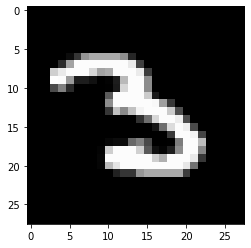

In [3]:
pp_train = f'to_rgb|value_range(-1, 1)|keep(["image"])'

ds = input_utils.get_data('mnist', 'train', rng, 256, preprocess_spec.parse(
          spec=pp_train, available_ops=preprocess_utils.all_ops()))
ds = input_utils.start_input_pipeline(ds, 1)

x_og = next(ds)['image'][0, 1]
plt.imshow(plotting_utils.rescale_for_imshow(x_og))

2023-04-27 15:02:14.433894: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


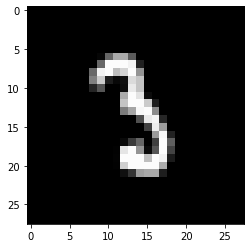

In [4]:
pp_train = f'to_rgb|random_zoom({jnp.log(2)}, {jnp.log(2)}, 0., 0.)|value_range(-1, 1)|keep(["image"])'

ds = input_utils.get_data('mnist', 'train', rng, 256, preprocess_spec.parse(
            spec=pp_train, available_ops=preprocess_utils.all_ops()))
ds = input_utils.start_input_pipeline(ds, 1)

x = next(ds)['image'][0, 1]
plt.imshow(plotting_utils.rescale_for_imshow(x))

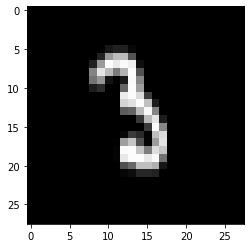

In [5]:
plt.imshow(plotting_utils.rescale_for_imshow(affine_transform_image(x_og, jnp.array([0, 0, 0, jnp.log(2.), 0., 0, 0]))))

2023-04-27 15:02:18.663616: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


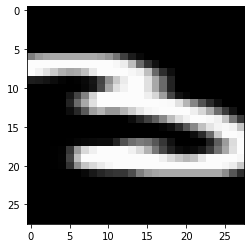

In [6]:
pp_train = f'to_rgb|random_zoom({jnp.log(.5)}, {jnp.log(.5)}, 0., 0.)|value_range(-1, 1)|keep(["image"])'

ds = input_utils.get_data('mnist', 'train', rng, 256, preprocess_spec.parse(
          spec=pp_train, available_ops=preprocess_utils.all_ops()))
ds = input_utils.start_input_pipeline(ds, 1)

x = next(ds)['image'][0, 1]
plt.imshow(plotting_utils.rescale_for_imshow(x))

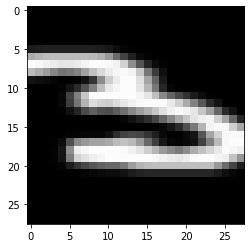

In [7]:
plt.imshow(plotting_utils.rescale_for_imshow(affine_transform_image(x_og, jnp.array([0, 0, 0, jnp.log(0.5), 0., 0, 0]))))

2023-04-27 15:02:19.579436: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


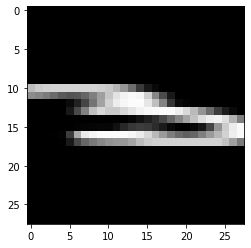

In [8]:
pp_train = f'to_rgb|random_zoom({jnp.log(.5)}, {jnp.log(.5)}, {jnp.log(2.)}, {jnp.log(2.)})|value_range(-1, 1)|keep(["image"])'

ds = input_utils.get_data('mnist', 'train', rng, 256, preprocess_spec.parse(
          spec=pp_train, available_ops=preprocess_utils.all_ops()))
ds = input_utils.start_input_pipeline(ds, 1)

x = next(ds)['image'][0, 1]
plt.imshow(plotting_utils.rescale_for_imshow(x))

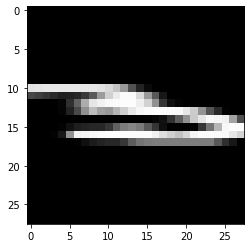

In [9]:
plt.imshow(plotting_utils.rescale_for_imshow(affine_transform_image(x_og, jnp.array([0, 0, 0, jnp.log(.5), jnp.log(2.), 0, 0]))))

2023-04-27 15:02:20.821605: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


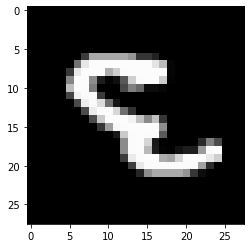

In [10]:
pp_train = f'to_rgb|random_rotate(180, 180)|value_range(-1, 1)|keep(["image"])'

ds = input_utils.get_data('mnist', 'train', rng, 256, preprocess_spec.parse(
          spec=pp_train, available_ops=preprocess_utils.all_ops()))
ds = input_utils.start_input_pipeline(ds, 1)

x = next(ds)['image'][0, 1]
plt.imshow(plotting_utils.rescale_for_imshow(x))

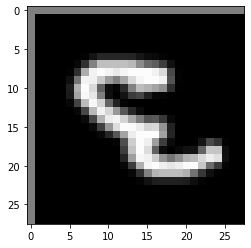

In [11]:
plt.imshow(plotting_utils.rescale_for_imshow(rotate_image(x_og, np.pi)))

In [12]:
import jax

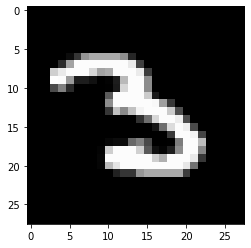

In [13]:
plt.imshow(plotting_utils.rescale_for_imshow(jax.lax.pad(x_og, -1., [(0, 0, 0), (0, 0, 0), (0, 0, 0)])))

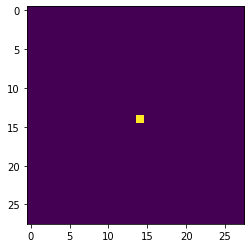

In [14]:
x_tmp = jnp.zeros((28, 28, 1))
x_tmp = x_tmp.at[14, 14, :].set(1.)
plt.imshow(x_tmp)

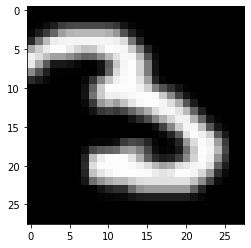

In [15]:
plt.imshow(plotting_utils.rescale_for_imshow(affine_transform_image(x_og, jnp.array([0, 0, 0, -0.33, -0.33, 0, 0]))))

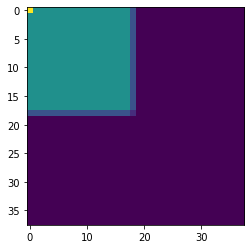

In [16]:
plt.imshow(affine_transform_image(jax.lax.pad(x_tmp, 0., [(5, 5, 0), (5, 5, 0), (0, 0, 0)]), jnp.array([jnp.log(jnp.e), jnp.log(jnp.e), 0, 0, 0, 0, 0])))

In [17]:
import distrax

In [18]:
distrax.Uniform(low=jnp.array([1., 0.]), high=jnp.array([2., 1.])).sample(seed=rng)

DeviceArray([1.2162954, 0.8041241], dtype=float32)

## Sanity check for CIFAR10

2023-04-27 15:02:24.833523: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


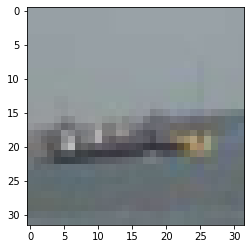

In [19]:
pp_train = f'value_range(-1, 1)|keep(["image"])'

ds = input_utils.get_data('cifar10', 'train', rng, 256, preprocess_spec.parse(
          spec=pp_train, available_ops=preprocess_utils.all_ops()))
ds = input_utils.start_input_pipeline(ds, 1)

x = next(ds)['image'][0, 0]
plt.imshow(plotting_utils.rescale_for_imshow(x))

2023-04-27 15:02:25.775574: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


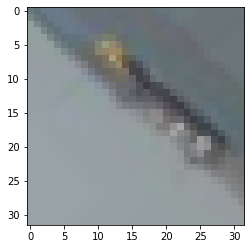

In [20]:
pp_train = f'value_range(-1, 1)|random_rotate(135, 135)|keep(["image"])'

ds = input_utils.get_data('cifar10', 'train', rng, 256, preprocess_spec.parse(
          spec=pp_train, available_ops=preprocess_utils.all_ops()))
ds = input_utils.start_input_pipeline(ds, 1)

x = next(ds)['image'][0, 0]
plt.imshow(plotting_utils.rescale_for_imshow(x))

## Check that each element in the batch gets a different random seed

2023-04-27 15:02:26.800813: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


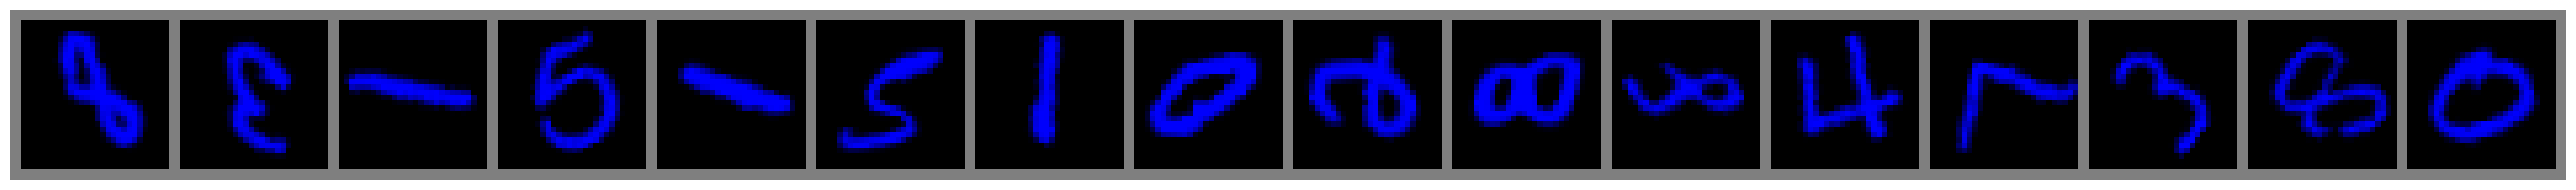

In [21]:
pp_train = f'to_rgb(color=2)|value_range(-1, 1)|random_rotate(0, 180)|keep(["image"])'

ds = input_utils.get_data('mnist', 'train', rng, 256, preprocess_spec.parse(
          spec=pp_train, available_ops=preprocess_utils.all_ops()))
ds = input_utils.start_input_pipeline(ds, 1)

xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0, :16], 16);

## Color Transformations

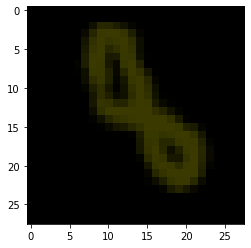

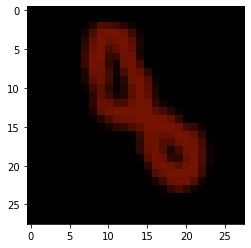

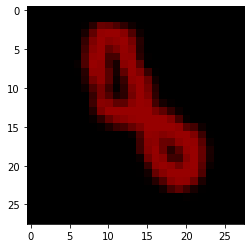

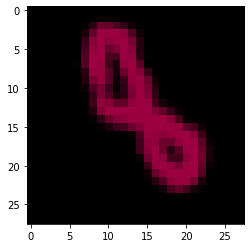

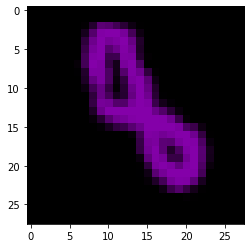

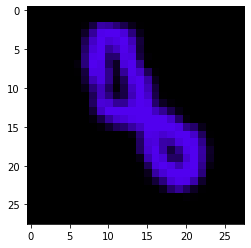

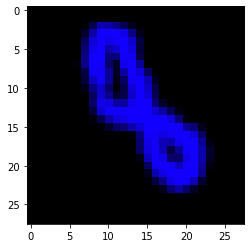

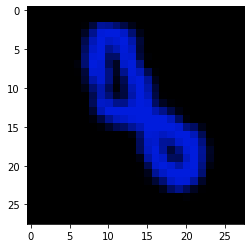

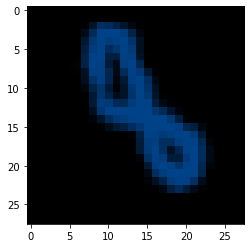

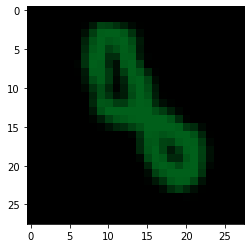

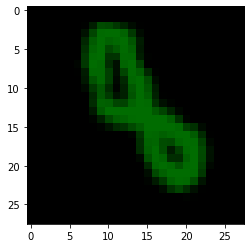

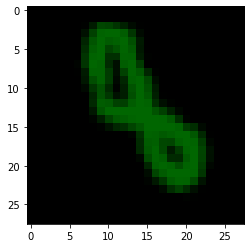

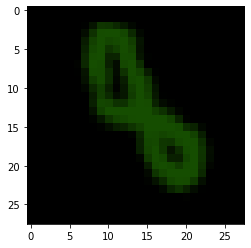

In [22]:
for i in np.arange(-jnp.pi, jnp.pi, 0.5):
  plt.imshow(plotting_utils.rescale_for_imshow(color_transform_image(xs[0, 0], jnp.array([i, 1., 0., 1.]))))
  plt.show()

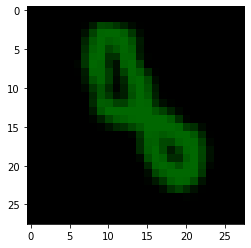

In [23]:
plt.imshow(plotting_utils.rescale_for_imshow(hsv_transform_image(xs[0, 0], jnp.array([jnp.pi/2, 1.]))))

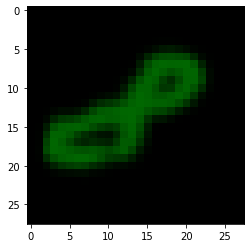

In [24]:
plt.imshow(plotting_utils.rescale_for_imshow(transform_image(xs[0, 0], jnp.array([0., 0., jnp.pi/2, 0., .0, jnp.pi/2, 1.]))))